In [12]:
import pandas as pd
import numpy as np

from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error as mae

pd.plotting.register_matplotlib_converters()

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
path = 'https://github.com/dataworkshop/5dwchallenge_2019/blob/master/challenge5/input/visits.csv?raw=true'

df = pd.read_csv(path, parse_dates=['published'], index_col='published')
df.head()


,post_id
published,
2008-01-01 18:19:00,18284
2008-01-01 18:30:00,18285
2008-01-01 18:34:00,18286
2008-01-02 01:32:00,18291
2008-01-02 14:34:00,18294


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 134137 entries, 2008-01-01 18:19:00 to 2016-10-31 23:56:00
Data columns (total 1 columns):
post_id    134137 non-null int64
dtypes: int64(1)
memory usage: 2.0 MB


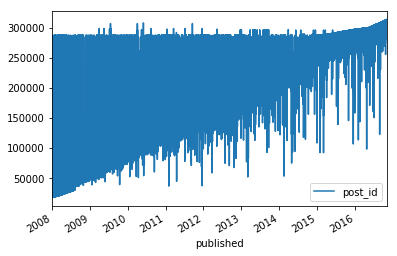

In [8]:
df.plot();

In [11]:
#1y = per rok
#1m = per miesiąc
df.resample('1y').count()
df.resample('1m').count()

,post_id
published,
2008-01-31,435
2008-02-29,496
2008-03-31,545
2008-04-30,597
2008-05-31,635
2008-06-30,599
2008-07-31,674
2008-08-31,677
2008-09-30,914


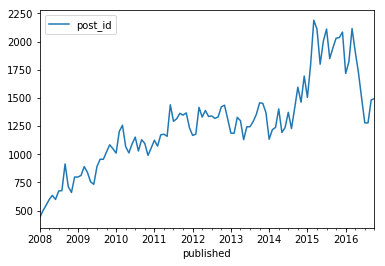

In [14]:
 #WIZUALIZACJA per miesiąc
    
df.resample('1M').count().plot();

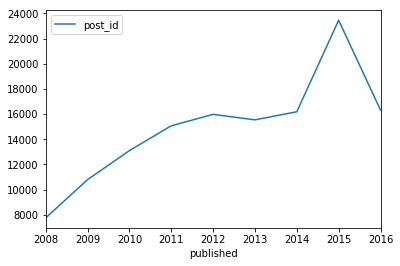

In [15]:
#WIZUALIZACJA per rok

df.resample('1Y').count().plot();

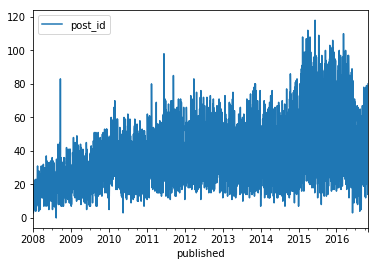

In [16]:
#WIZUALIZACJA per dzień

df.resample('1D').count().plot();

In [19]:
df_day = df.resample('1D').count().reset_index()
df_day.columns = ['ds', 'y']

df_day

,ds,y
0,2008-01-01,3
1,2008-01-02,3
2,2008-01-03,4
3,2008-01-04,14
4,2008-01-05,4
5,2008-01-06,7
6,2008-01-07,17
7,2008-01-08,8
8,2008-01-09,15
9,2008-01-10,20


In [21]:
#szykujemy zbiór testowy złożony z 30 pkt (końcówka zbioru)
#od początku do 30 pkt od końca [np. 0:1] - zbiór treningowy
#30 ostatnich punktów - zbiór testowy

num_points = 30

train = df_day[:-num_points]
test  = df_day[-num_points:]

In [22]:
m = Prophet()
m.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Marta\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [49]:
future = m.make_future_dataframe(periods=num_points, freq='D', include_history=True)

In [43]:
future

,ds
0,2016-10-02
1,2016-10-03
2,2016-10-04
3,2016-10-05
4,2016-10-06
5,2016-10-07
6,2016-10-08
7,2016-10-09
8,2016-10-10
9,2016-10-11


#PROGNOZOWANIE

In [56]:
forecast = m.predict(future)

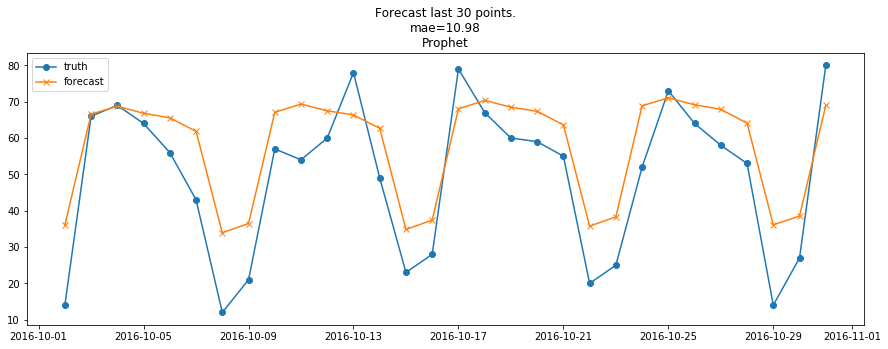

In [58]:
def plot_forecast(test, forecast):
    forecast = forecast[-num_points:]
    score = np.round(mae(test.y, forecast.yhat),2)
    
    plt.figure(figsize=(15,5))
    plt.title('Forecast last {} points.\nmae={}\nProphet'.format(num_points, score))
    plt.plot(test.ds, test.y, 'o-', label='truth');
    plt.plot(test.ds, forecast.yhat, 'x-', label='forecast');
    plt.legend();
    
plot_forecast(test, forecast);

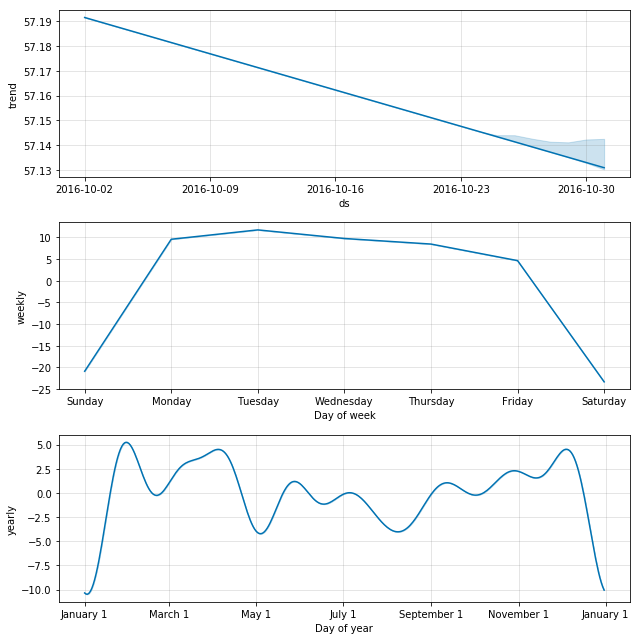

In [46]:
m.plot_components(forecast);

WALIDACJA

In [61]:
len(train), len(test)

(3197, 30)

In [64]:
from fbprophet.diagnostics import cross_validation

#period = co ile punktów przeskakujemy z każdym okienkiem
#horizon = ilość punktów prognozowana w pojedynczym okienku
df_cv = cross_validation(m, initial='2500 days', period='10 days', horizon='30 days')

INFO:fbprophet:Making 67 forecasts with cutoffs between 2014-11-11 00:00:00 and 2016-09-01 00:00:00
C:\Users\Marta\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Marta\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Marta\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Marta\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecat

C:\Users\Marta\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Marta\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Marta\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Marta\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

C:\Users\Marta\Anaconda3

In [66]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-11-12,52.380845,39.476312,63.362292,75,2014-11-11
1,2014-11-13,51.117688,40.217708,62.926024,72,2014-11-11
2,2014-11-14,48.707290,36.077081,60.082104,60,2014-11-11
3,2014-11-15,25.653702,13.633993,37.713894,20,2014-11-11
4,2014-11-16,26.726292,15.283189,38.177333,26,2014-11-11
5,2014-11-17,52.808066,41.241839,64.336868,74,2014-11-11
6,2014-11-18,53.938203,42.203589,65.783212,76,2014-11-11
7,2014-11-19,52.642072,41.014404,63.846064,71,2014-11-11
8,2014-11-20,51.531396,40.183036,63.670648,55,2014-11-11
9,2014-11-21,49.271187,37.326650,60.310569,62,2014-11-11


In [68]:
df_cv.groupby('cutoff').count()

#cutoff - co 10 punktów
#prognoza po 30 punktów w każdym okienku

,ds,yhat,yhat_lower,yhat_upper,y
cutoff,,,,,
2014-11-11,30,30,30,30,30
2014-11-21,30,30,30,30,30
2014-12-01,30,30,30,30,30
2014-12-11,30,30,30,30,30
2014-12-21,30,30,30,30,30
2014-12-31,30,30,30,30,30
2015-01-10,30,30,30,30,30
2015-01-20,30,30,30,30,30
2015-01-30,30,30,30,30,30


In [69]:
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [71]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,coverage
0,3 days,371.150304,19.265262,16.287132,0.565282,0.422886
1,4 days,335.708456,18.322349,15.714201,0.436009,0.417910
2,5 days,346.736224,18.620855,15.821907,0.476809,0.452736
3,6 days,349.748861,18.701574,15.630649,0.459993,0.482587
4,7 days,377.628811,19.432674,16.180060,0.468095,0.457711
5,8 days,369.660024,19.226545,15.836047,0.437173,0.457711
6,9 days,360.744145,18.993266,15.715614,0.436389,0.452736
7,10 days,404.194842,20.104598,16.477319,0.472467,0.457711
8,11 days,417.506722,20.432981,16.715496,0.585568,0.447761
9,12 days,424.200999,20.596140,17.209722,0.588146,0.417910


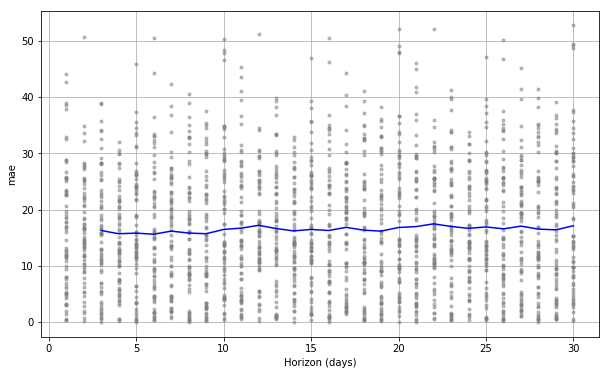

In [73]:
plot_cross_validation_metric(df_cv, 'mae');

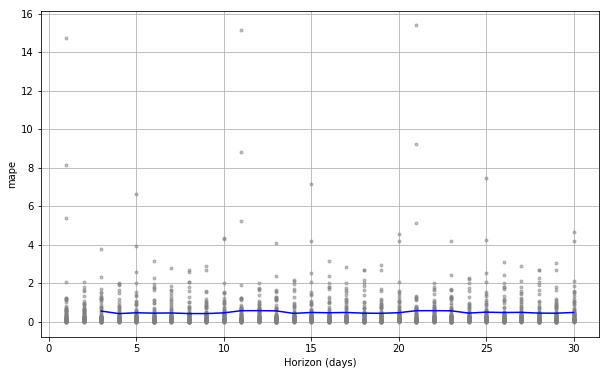

In [74]:
plot_cross_validation_metric(df_cv, 'mape');

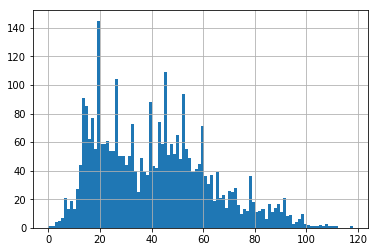

In [79]:
#usprawnienie jakości prognozy - logarytmizacja danych

train.y.hist(bins=100);

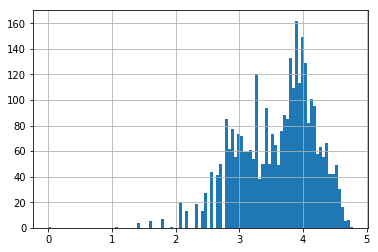

In [81]:
#logarytmizacja powyższego
np.log1p(train.y).hist(bins=100);

In [82]:
num_points = 100
train = df_day[:-num_points]
test = df_day[-num_points:]

train_log = train.copy()
train_log['y'] = np.log1p( train_log['y'] )

In [83]:
m = Prophet()
m.fit(train_log)
future = m.make_future_dataframe(periods = num_points, freq='D', include_history=False)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Marta\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [86]:
forecast = m.predict(future)
forecast['yhat'] = np.expm1(forecast.yhat)

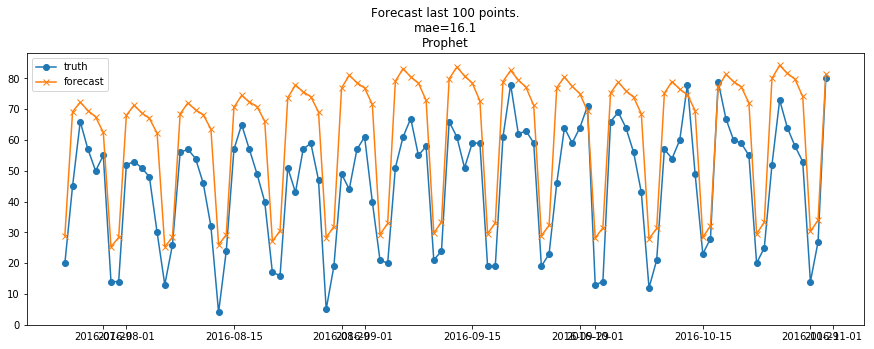

In [87]:
plot_forecast(test, forecast)

In [ ]:
#inne przekształcenia do samodzielnego przerobienia - PROGNOZOWANIE SZEREGÓW CZASOWYCH:
#BOXCOX
#model ARIMA (metody statystyczne)
#dowodzenie wykładnicze
#sieci neuronowe, rekurencyjne


#Kurs Vladimira o szeregach czasowych (6 tygodni)